# Lab 5: Plotting

## 1. Subplots, and other matplotlib tweaks

Recall from Lab 1 that we used the `odeint` function to find the numerical solution of a system of ODEs, and we plotted a solution trajectory. This was illustrated by the following example (Example 1 in §7.6 of Boyce & DiPrima).

***
### Example
Plot the solution of the system $$\mathbf{x}'=\begin{pmatrix}-\frac12 & 1\\ -1 & -\frac12\end{pmatrix}\mathbf{x},$$
with initial condition $(-2, -3)$.
***

In Lab 1 we used the following code to produce a plot of one trajectory:

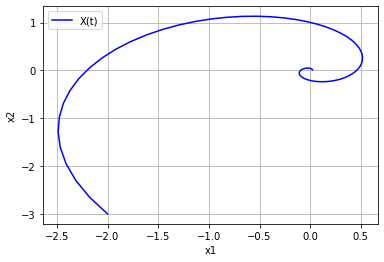

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Define the equation
def dX_dt(X, t):
    x1, x2 = X
    return [-0.5*x1+x2, -x1-0.5*x2]

# Initial conditions
X0 = [-2, -3]

# Set up the time samples
t = np.linspace(0, 10, 100)

# Solve
Xsol = odeint(dX_dt, X0, t)

# Plot the (x1, x2) coordinates of the solution
plt.plot(Xsol[:, 0], Xsol[:, 1], 'b', label='X(t)')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

We're going to build on this, to produce a figure like Figure 7.6.2 in Boyce & DiPrima. This has two panels: a phase portrait on the left, and a plot of $x_1$ versus $t$ for different initial conditions on the right.

To achieve this, we use the `subplots` function to specify the layout of the plots into two columns. We then use code from Lab 3 to produce a vector field and plot this on the left-hand axes, and plot a $(t, x_1(t))$ curve on the right-hand axes.

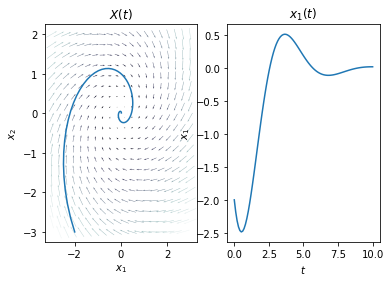

In [2]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Compute the vector field - X,Y are the grid points, U,V the corresponding arrow sizes
X, Y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 2, 20))
U, V = dX_dt([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

# Plot vector field
axes[0].quiver(X, Y, U, V, M, scale=1/0.02, pivot = 'mid', cmap = plt.cm.bone)
# Add a trajectory
axes[0].plot(Xsol[:, 0], Xsol[:, 1])
axes[0].set_title("$X(t)$")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")

# Produce the right-hand plot
axes[1].plot(t, Xsol[:, 0])
axes[1].set_title("$x_1(t)$")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$x_1$")

plt.show()

We can make this plot nicer by:
* setting the size of the figure with `figsize=(10, 5)` to specify the overall width and height
* adding `fig.tight_layout()` to stop the two sub-plots from overlapping
* adding a grid to the axes with `.grid(True)`
* restricting the range of times plotted on the right-hand plot to $0\leq t\leq 5$, in line with the plot in the book

Another important point is that for the phase portrait, we should set the aspect ratio of the plot to be 1:1 so that the arrows of the direction field are pointing in the right directions (for instance, an arrow drawn at $45^\circ$ will still be drawn at that angle even if the plot is stretched horizontally, giving an inaccurate impression of the direction field). We can fix this by adding `set_aspect("equal")`.

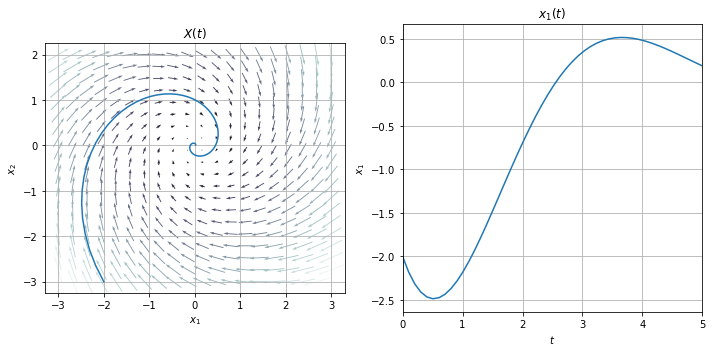

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Compute the vector field - X,Y are the grid points, U,V the corresponding arrow sizes
X, Y = np.meshgrid(np.linspace(-3, 3, 20), np.linspace(-3, 2, 20))
U, V = dX_dt([X,Y],0)

# define colours for each vector based on their lengths
M = np.hypot(U, V)

# Plot vector field
axes[0].quiver(X, Y, U, V, M, scale=1/0.02, pivot = 'mid', cmap = plt.cm.bone)

axes[0].plot(Xsol[:, 0], Xsol[:, 1])
axes[0].set_title("$X(t)$")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].set_aspect("equal")
axes[0].grid(True)

axes[1].plot(t, Xsol[:, 0])
axes[1].set_title("$x_1(t)$")
axes[1].set_xlabel("$t$")
axes[1].set_ylabel("$x_1$")
axes[1].set_xlim(0,5)
axes[1].grid(True)

fig.tight_layout()

plt.show()

<div class="alert alert-info">
    <h3>Exercise 1.1</h3>

Add further trajectories to the plots to make the figure appear more like the one in the book. For the phase portrait, add at least two more trajectories. For the plot on the right, add trajectories with $x_1(0)=-1, 0, 0.5, 1$. (Recall that in Lab 1, we used a loop to do this.)
</div>

For further guidance on the features of `matplotlib`, [these lecture notes](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) are a useful source, in addition to the [matplotlib documentation](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

## 2. Plotting in 3D

The techniques we have been using also extend to producing plots of 3d systems. Here, we will consider the Lorenz equations:

$$\begin{align}\frac{dx}{dt}&=\sigma(-x+y) \\ \frac{dy}{dt} &= rx-y-xz \\ \frac{dz}{dt} &= -bz+xy\end{align}$$

which are discussed in section 9.8 of Boyce & DiPrima.

We create a function to represent the system as usual, and use `odeint` to find the solution for given initial conditions:

In [4]:
# Lorenz system, with defaults for parameters in line with those used in BdP section 9.8
def Lorenz_dX_dt(X, t, sigma=10, b=8/3, r=28):
    x, y, z = X
    return [sigma*(-x+y), r*x-y-x*z, -b*z+x*y]

X0 = [5, 5, 5]
t = np.linspace(0, 20, 2000)
Xsol = odeint(Lorenz_dX_dt, X0, t)

To plot in 3d, we just need to import some extra functionality, and specify `projection='3d'` in our plotting code:

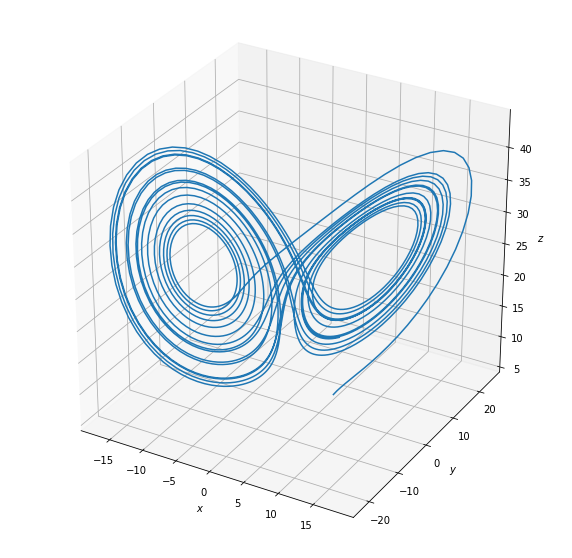

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Set up figure & 3D axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the solution
plt.plot(Xsol[:, 0], Xsol[:, 1], Xsol[:, 2])

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

Note: it is possible to make this plot interactive, so you can rotate it with the mouse, by using `%matplotlib notebook` instead of `%matplotlib inline` right at the start of the notebook. You will also need to restart the kernel to get that working ("Kernel > Restart & Clear Output").

The trajectory looks like it might have some sort of periodic behaviour, but in fact the behaviour is **chaotic**. It is also very sensitive to the initial conditions -- for instance, we see quite different long-term behaviour if the initial condition is set to $(5.01,5,5)$ instead. The following code replicates Figure 9.8.3 which shows this:

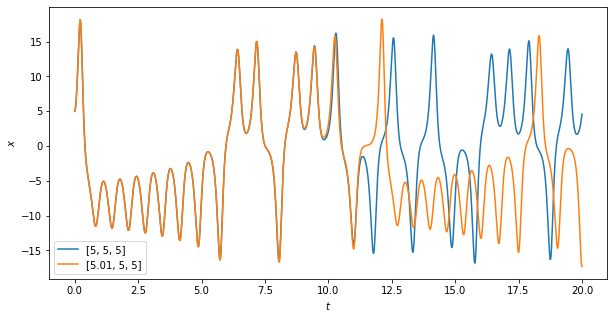

In [6]:
# Set up figure & 3D axis
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

t = np.linspace(0, 20, 2000)

# Plot the solution from different starting points
for X0 in [[5, 5, 5], [5.01, 5, 5]]:
    Xsol = odeint(Lorenz_dX_dt, X0, t)
    plt.plot(t, Xsol[:, 0], label = X0)

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend()

plt.show()

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>

Produce two 3d plots, showing the solutions starting from $(3, 8, 0)$ and from $(5, 5, 10)$ (using the default parameters).
</div>

Note that it is also possible to combine 3d plots with animations, as can be see in [this blog post about the Lorenz system](http://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/).